# Use case 1: Shower tracks

In [1]:
import showermodel as sm
import toml
import numpy as np

The `ShowerModel` package includes tools to make geometric calculations and to visualize the projection of linear shower tracks in the local coordinate system of a telescope. This notebook describes the use of the classes `Track`, `Telescope` and `Projection`.

### Construction of a shower track

A shower track can be constructed using the `Track` class. The default `Track` object corresponds to a vertical shower with impact point at the origin of coordinates on ground. By default, the track is assumed to start at the top of the atmosphere at 112.83 km a.s.l and to end at sea level, where the atmosphere is discretized in 550 steps. However, the track direction, the initial point (or the impact point on ground) as well as the atmosphere interval and discretization can be specified when constructing a `Track` object by means of the following input parameters:

- `theta` : Zenith angle in degrees. Default 0.
- `alt` : Altitude angle in degrees. If None, `theta` is used. If given, `theta` is overwritten. Default None.
- `az` : Azimuth angle (from north, clockwise) in degrees. Default None.
- `x0`, `y0` : East and north coordinates in km of shower impact point on ground. Default (0, 0).
- `xi`, `yi`, `zi` : East, north and height (from ground level) coordinates in km of the first interaction point of the shower. If `zi` is not given, these parameters are ignored and (`x0`, `y0`) are used. If `zi` is given, (`x0`, `y0`) are ignored and (`xi`, `yi`, `zi`) are used instead. Default (0, 0, None).
- `h0` : Ground level in km above sea level. Default 0.
- `h_top` : Upper limit in km above sea level of the atmosphere interval to be discretized. If not given, `h_top` is set to be the top level of the atmosphere. Default None.
- `N_steps` : Number of discretization steps. Default 550.        

In [2]:
# Default vertical track
# track = sm.Track()

# Track with impact point at 0.5 km east, 0.1 km north, zenith angle of 20 degrees and azimuth angle of 30 degrees
# track = sm.Track(x0=0.5, y0=0.1, theta=20., az=30.)  # alt=70. can be used instead of theta=20.

# Setting ground level (km asl) and the number of discretization steps
track = sm.Track(theta=20., h0=1.8, N_steps=600)

# Ascending track with initial point at 14 km above sea level (e.g., neutrino-induced shower) 
#track = sm.Track(xi=0.5, yi=0.1, zi=14., theta=160.)  # Note that h0=0 by default

# The same as the previous example, but the track initial point being at sea level.
# track = sm.Track(x0=0.5, y0=0.1, theta=160.)  # Equivalent to xi=0.5, yi=0.1, zi=0.

`Track` is a subclass of `DataFrame` and stores the (`x`, `y`, `z`) coordinates in km of each track point and the travel time `t` in microseconds assuming the speed of light.

In [3]:
track

,x,y,z,t
0,0.0,0.033676,0.092524,393.793577
1,0.0,0.101028,0.277573,393.136707
2,0.0,0.168381,0.462622,392.479837
3,0.0,0.235733,0.647670,391.822967
4,0.0,0.303085,0.832719,391.166097
...,...,...,...,...
595,0.0,40.108239,110.196481,2.955915
596,0.0,40.175591,110.381530,2.299045
597,0.0,40.242943,110.566578,1.642175
598,0.0,40.310296,110.751627,0.985305


`Track` has also some useful attributes and methods.

In [4]:
track = sm.Track(x0=0.5, y0=0.1, theta=20., az=120., h0=1.8)

print("Unit vector parallel to shower axis (upwards):", np.around([track.ux, track.uy, track.uz], 3))
print("Coordinates of ground impact point:", np.around([track.x0, track.y0, 0.], 3))
print("Coordinates of shower point at 3.5 km a.s.l.:", np.around(track.h_to_xyz(3.5), 3))
print("Travel time in us of shower front at 27 km above observation level:", np.around(track.z_to_t(27.), 3))

Unit vector parallel to shower axis (upwards): [ 0.296 -0.171  0.94 ]
Coordinates of ground impact point: [0.5 0.1 0. ]
Coordinates of shower point at 3.5 km a.s.l.: [ 1.036 -0.209  1.7  ]
Travel time in us of shower front at 27 km above observation level: 298.28


Help on `Track` including the full list of input parameters, attributes and methods.

In [5]:
# track?

### Shower track projection relative to a telescope position

The `Telescope` class allows you to construct a telescope. The default `Telescope` object corresponds to a telescope positioned at the origin of coordinates, pointing at zenith direction and with an angular aperture of 10 degrees (a circular field of view is assumed). However, you may modify all these parameters as illustrated below (see UC3 for more details).

In [6]:
# Telescope positioned at 0.1 km east, 0.2 km south and 0.1 km above ground level (e.g., on a hill)
# telescope = sm.Telescope(x=0.1, y=-0.2, z=0.1)

# Setting the pointing direction and aperture
telescope = sm.Telescope(x=0.1, y=-0.2, z=0.1, theta=20., az=120., apert=12.)

Help on `Telescope`.

In [7]:
# sm.Telescope?

Once a `Track` object and a `Telescope` object are created, a `Projection` object can be constructed from them. `Projection` is also a subclass of `DataFrame` and contains the coordinates of the track points relative to a telescope position:

- `distance` : Point-telescope distance in km.
- `alt`, `az` : Altitude and azimuth angles in degrees in zenith projection, where `az` increses clockwise from north.
- `theta`, `phi` : Offset and projection angles in degrees in field-of-view projection angles, where `phi` increses clockwise from north.
- `beta` : Angular distance relative to the apparent position of the cosmic-ray source (at infinity). Notice that `beta = theta` if the telescope points at the source position.
- `time` : Arrival time in microseconds of light emitted from each shower point and reaching the telescope.
- `FoV` : `True` or `False` depending on whether the track point is inside the telescope field of view or not.

Notice that `theta`, `alt` and `az` have different meanings that the input parameters of same names of `Track` and `Telescope`.

In [8]:
projection = sm.Projection(telescope, track)
projection

,distance,alt,az,theta,phi,beta,time,FoV
0,0.515540,0.103984,56.887513,81.003132,306.074599,81.003132,1.447076,False
1,0.588703,20.151143,63.697352,59.876772,306.074599,59.876772,0.974535,False
2,0.720876,34.150606,69.578691,44.939486,306.074599,44.939486,0.698830,False
3,0.886033,43.201629,74.608921,35.078197,306.074599,35.078197,0.533149,False
4,1.068993,49.134256,78.897894,28.446219,306.074599,28.446219,0.426855,False
...,...,...,...,...,...,...,...,...
545,117.162399,69.891810,119.345934,0.249013,306.074599,0.249013,0.000030,True
546,117.377224,69.892011,119.347125,0.248557,306.074599,0.248557,0.000023,True
547,117.592049,69.892210,119.348311,0.248103,306.074599,0.248103,0.000017,True
548,117.806874,69.892409,119.349493,0.247651,306.074599,0.247651,0.000010,True


`Projection` objects can also be created via methods of `Track` and `Telescope`.

In [9]:
# Equivalent method of Track
# projection = track.Projection(telescope)

# Equivalent method of Telescope
# projection = telescope.Projection(track)

There are some useful attributes and methods of both `Telescope` and `Projection`.

In [10]:
print("Angular aperture in degrees of the telescope:", telescope.apert)
print("Unit vector parallel to the telescope pointing direction:", np.around([telescope.ux, telescope.uy, telescope.uz], 3))
print("FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope:",
      np.around(telescope.altaz_to_thetaphi(72., 120.), 3))  # Equivalent to projection.altaz_to_thetaphi(72., 120.)
print("theta/phi coordinates of the apparent position of the cosmic-ray source:",
      np.around([projection.theta_inf, projection.phi_inf], 3))
print("Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source:",
      np.around(projection.beta_0, 3))

Angular aperture in degrees of the telescope: 12.0
Unit vector parallel to the telescope pointing direction: [ 0.296 -0.171  0.94 ]
FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope: [ 2.    61.519]
theta/phi coordinates of the apparent position of the cosmic-ray source: [  0.    255.555]
Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source: 93.012


Help on `Projection`.

In [11]:
# sm.Projection?

### Shower track visualtization

`Projection` has also a method to visualize the shower track in both zenith projection and the telescope field of view projection. The track points are shown in red and the telescope's field of view is shown as a green circle in both plots. The planes `phi=0`, `phi=90` and `theta=90` are also shown as dashed green lines in the zenith projection plot. Likewise, the planes `az=0`, `az=90` and `alt=0` are shown in the FoV projection plot, which is oriented so that the zenith is at the top. In the example below, the horizon line (i.e., `alt=0`) is not shown in the FoV projection plot because it is limited to `theta<30` by default.

The generated plots can be stored in `PolarAxesSubplot` objects for later modification.

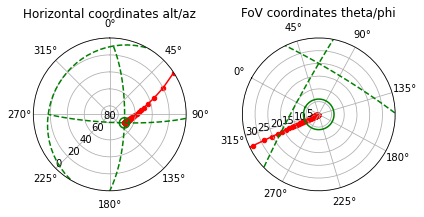

In [12]:
# Just show the plots
projection.show();  

# Store the plots in PolarAxesSubplot objects
# ax1, ax2 = projection.show()

# Equivalent method of Track
# projection, (ax1, ax2) = track.show_projection(telescope)

There are also some plot options.

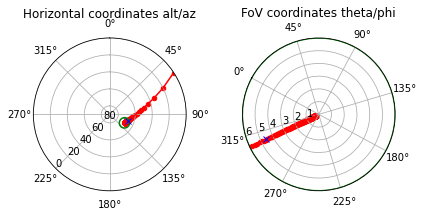

In [13]:
# No axes, maximum offset angle in the FoV plot set to 6 degrees
# and blue mark at slanth depth of 400 g/cm2 (its position depends on the shower profile, see UC2)
projection.show(axes=False, X_mark=400., max_theta=6.);   # telescope.apert = 12.

Help on `projection.show` method.

In [14]:
# projection.show?

### Example of track 'search'

These tools can be used to determine the telescope pointing direction needed to observe a certain interval of a shower track.

In [15]:
# Ascending shower starting at ground level (e.g., neutrino shower)
# We are only interested in the lower part of the atmosphere, hence h_top=5.
track = sm.Track(x0=0.54, y0=-0.56, theta=120., az=47., h_top=5., N_steps=70)
# Telescope placed on the top of a mountain
telescope = sm.Telescope(x=-0.2, y=-0.1, z=2., apert=20.)
projection = sm.Projection(telescope, track)
projection.query('(alt < -30.)')  # Lower part of the shower

,distance,alt,az,theta,phi,beta,time,FoV
0,2.143199,-66.422593,125.860256,156.422593,234.139744,58.319265,0.110304,False
1,2.071742,-66.015400,134.147750,156.015400,225.852250,61.683310,0.348471,False
2,2.007921,-65.110560,142.555572,155.110560,217.444428,65.274284,0.612106,False
3,1.952484,-63.675138,150.731616,153.675138,209.268384,69.084911,0.903709,False
4,1.906163,-61.715088,158.377797,151.715088,201.622203,73.099288,1.225719,False
5,1.869636,-59.271935,165.304201,149.271935,194.695799,77.291864,1.580397,False
6,1.843484,-56.413315,171.435683,146.413315,188.564317,81.627256,1.969685,False
7,1.828154,-53.222264,176.784819,143.222264,183.215181,86.061215,2.395069,False
8,1.823918,-49.788125,181.415725,139.788125,178.584275,90.542838,2.857458,False
9,1.830853,-46.199635,185.414478,136.199635,174.585522,95.017841,3.357111,False


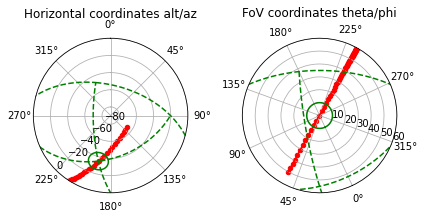

In [16]:
# Setting the new pointing (see UC3 for details) and visualize the shower track
telescope.alt = -35.
telescope.az = 195.
projection = sm.Projection(telescope, track)
projection.show(max_theta=60.);

Note: As the telescope is looking down, the left-side plot shows the nadir projection instead of the zenith projetion (i.e., `alt` takes negative values). Therefore, in the FoV projection (right-side plot), the horizon line is at the top and the nadir point is at the bottom.

### Default parameters of classes

As indicated above, `ShowerModel` classes have default parameters to ease the construction of objects (e.g., `track = sm.Track()`). They are stored in a key-value format in a cofiguration toml file named 'showermodel_config.toml', a copy of which is available in the 'extra' folder included in the package. You may change these default parameters for your convenience in this sample config file (e.g., you may want to change the default ground level `h0`). Then, put the modified file in the working directory for the changes to take effect. More examples are explained in UC2 and UC3.

In [17]:
# Sample of the content of ..extra/showermodel_config.toml where h0 has been changed to 2.2 km
# Data is stored in a nested dictionary
config = toml.load("../extra/showermodel_config.toml")
h0_user = config['Atmosphere']['h0']  # h0 is a property of Atmosphere (see UC2)
print("Default ground level in sample config file: ", h0_user)

# The default parameters actually used in ShowerModel can be accessed this way
h0_sm = sm.constants.config['Atmosphere']['h0']
print("Default ground level in ShowerModel: ", h0_sm)

# Some other parameters
# config['Atmosphere']['N_steps']
# config['Shower']['theta']
# conifg['Telescope']['apert']

Default ground level in sample config file:  2.2
Default ground level in ShowerModel:  0.0
